In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_table(r'C:\Users\Vatsal\Desktop\projects\Assignments\Python Project\XYZCorp.txt', sep='\t')
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   
3  1076863    1277178    10000.0      10000.0          10000.0   36 months   
4  1075358    1311748     3000.0       3000.0           3000.0   60 months   

   int_rate  installment grade sub_grade                 emp_title emp_length  \
0     10.65       162.87     B        B2                       NaN  10+ years   
1     15.27        59.83     C        C4                     Ryder   < 1 year   
2     15.96        84.33     C        C5                       NaN  10+ years   
3     13.49       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4     12.69        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status   issue_d pymnt_plan  \
0           RENT     24000.0            Verified  Dec-2011          n   
1           RENT     30000.0     Source Verified  Dec-2011          n   
2           RENT     12252.0        Not Verified  Dec-2011          n   
3           RENT     49200.0     Source Verified  Dec-2011          n   
4           RENT     80000.0     Source Verified  Dec-2011          n   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0         Jan-1985             1.0                     NaN   
1         Apr-1999             5.0                     NaN   
2         Nov-2001             2.0                     NaN   
3         Feb-1996             1.0                    35.0   
4         Jan-1996             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0    13648.0        83.7   
1                     NaN       3.0      0.0     1687.0         9.4   
2                     NaN       2.0      0.0     2956.0        98.5   
3                     NaN      10.0      0.0     5598.0        21.0   
4                     NaN      15.0      0.0    27783.0        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302212   
4       38.0                   f      766.9          766.9   3242.170000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5831.78          5000.00         861.07                0.00   
1          1008.71           456.46         435.17                0.00   
2          3003.65          2400.00         603.65                0.00   
3         12226.30         10000.00        2209.33               16.97   
4          3242.17          2233.10        1009.07                0.00   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0  

In [4]:
df.shape

(855969, 73)

In [5]:
df_rev = pd.DataFrame(df)
df_rev.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
total_rev_hi_lim     67313
inq_fi              842681
total_cu_tl         842681
inq_last_12m        842681
default_ind              0
Length: 73, dtype: int64

In [6]:
# Creating dataframe of variables of df_rev that have missing values more than 40%
na = df_rev.isnull().sum()
na = na[na.values>(0.4*len(df))]

In [7]:
# Variable names that have more than 40% null values
na.index

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi',
       'total_cu_tl', 'inq_last_12m'],
      dtype='object')

In [8]:
# Dropping the above and some other insignificant variables
df_rev.drop(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'mths_since_last_major_derog','dti_joint',
       'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi',
       'total_cu_tl', 'inq_last_12m','id','member_id','policy_code','emp_title',
       'title','zip_code','next_pymnt_d','addr_state','emp_length','pymnt_plan','acc_now_delinq'],
       axis=1,inplace=True)
df_rev.shape

(855969, 42)

In [9]:
# Dropping rows which has null values since both are date variables and it doesn't make sense imputing them
df_rev.dropna(subset=['last_pymnt_d'], how='all', inplace=True)
df_rev.dropna(subset=['last_credit_pull_d'], how='all', inplace=True)

In [10]:
# Converting some variables to date format as the problem statement specifies that we have to split the data on basis of issue_d
df_rev['issue_d'] = pd.to_datetime(df_rev['issue_d'])
df_rev.dtypes

loan_amnt                            float64
funded_amnt                          float64
funded_amnt_inv                      float64
term                                  object
int_rate                             float64
installment                          float64
grade                                 object
sub_grade                             object
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                       datetime64[ns]
purpose                               object
dti                                  float64
delinq_2yrs                          float64
earliest_cr_line                      object
inq_last_6mths                       float64
open_acc                             float64
pub_rec                              float64
revol_bal                            float64
revol_util                           float64
total_acc                            float64
initial_li

In [11]:
df_rev.isnull().sum()

loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
purpose                            0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths                     0
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                       435
total_acc                          0
initial_list_status                0
out_prncp                          0
out_prncp_inv                      0
total_pymnt                        0
total_pymnt_inv                    0
t

In [12]:
# Imputing missing values by median (because of only numeric variables missing)
for x in df_rev.columns[:]:
    if df_rev[x].dtype=='int64' or df_rev[x].dtype=='float64':
        df_rev[x].fillna(df_rev[x].median(), inplace=True)
    
df_rev.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collecti

In [13]:
df_rev.describe()

loan_amnt    funded_amnt  funded_amnt_inv       int_rate  \
count  847058.000000  847058.000000    847058.000000  847058.000000   
mean    14743.867480   14730.535660     14698.202700      13.199070   
std      8420.922935    8414.986905      8421.499728       4.368901   
min       500.000000     500.000000         0.000000       5.320000   
25%      8000.000000    8000.000000      8000.000000       9.990000   
50%     13000.000000   13000.000000     13000.000000      12.990000   
75%     20000.000000   20000.000000     20000.000000      15.990000   
max     35000.000000   35000.000000     35000.000000      28.990000   

         installment    annual_inc            dti    delinq_2yrs  \
count  847058.000000  8.470580e+05  847058.000000  847058.000000   
mean      436.282124  7.504371e+04      18.106874       0.311378   
std       243.651435  6.400388e+04      17.451880       0.856997   
min        15.690000  0.000000e+00       0.000000       0.000000   
25%       260.620000  4.500000e+04      11.870000       0.000000   
50%       382.550000  6.500000e+04      17.600000       0.000000   
75%       571.560000  9.000000e+04      23.880000       0.000000   
max      1445.460000  9.500000e+06    9999.000000      39.000000   

       inq_last_6mths       open_acc        pub_rec     revol_bal  \
count   847058.000000  847058.000000  847058.000000  8.470580e+05   
mean         0.681355      11.537981       0.194037  1.690941e+04   
std          0.964563       5.302616       0.580495  2.223556e+04   
min          0.000000       0.000000       0.000000  0.000000e+00   
25%          0.000000       8.000000       0.000000  6.473000e+03   
50%          0.000000      11.000000       0.000000  1.190600e+04   
75%          1.000000      14.000000       0.000000  2.085500e+04   
max          8.000000      90.000000      86.000000  2.904836e+06   

          revol_util      total_acc      out_prncp  out_prncp_inv  \
count  847058.000000  847058.000000  847058.000000  847058.000000   
mean       55.052020      25.271268    8223.232155    8219.887236   
std        23.798053      11.816497    8431.547095    8428.135865   
min         0.000000       2.000000       0.000000       0.000000   
25%        37.700000      17.000000       0.000000       0.000000   
50%        56.000000      24.000000    6197.990000    6195.360000   
75%        73.500000      32.000000   13441.820000   13437.050000   
max       892.300000     169.000000   49372.860000   49372.860000   

         total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
count  847058.000000    847058.000000    847058.000000  847058.000000   
mean     7732.623859      7701.233514      5912.007673    1773.417586   
std      7912.068760      7887.907071      6684.243319    2084.791349   
min         0.000000         0.000000         0.000000       0.000000   
25%      2034.217500      2023.830000      1289.050000     466.760000   
50%      5056.085000      5034.555000      3352.660000    1093.555000   
75%     10826.591224     10781.250000      8000.000000    2252.455000   
max     57777.579870     57777.580000     35000.030000   24205.620000   

       total_rec_late_fee     recoveries  collection_recovery_fee  \
count       847058.000000  847058.000000             847058.00000   
mean             0.322891      46.875711                  4.93460   
std              3.628185     410.211254                 62.28874   
min              0.000000       0.000000                  0.00000   
25%              0.000000       0.000000                  0.00000   
50%              0.000000       0.000000                  0.00000   
75%              0.000000       0.000000                  0.00000   
max            358.680000   33520.270000               7002.19000   

       last_pymnt_amnt  collections_12_mths_ex_med  annual_inc_joint  \
count    847058.000000               847058.000000     847058.000000   
mean       2249.265466                    0.014132     100746.567493   
std        4885.01

In [14]:
# We will delete two rows because the min value of annual income mentioned is 0 which is not possible, and no bank will give loan to anyone with 0 income
df_rev[df_rev['annual_inc'] == 0.0]

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
462577    20000.0      20000.0          20000.0   36 months     16.99   
508976     3700.0       3700.0           3700.0   36 months     12.59   

        installment grade sub_grade home_ownership  annual_inc  \
462577       712.96     D        D3       MORTGAGE         0.0   
508976       123.94     C        C2       MORTGAGE         0.0   

       verification_status    issue_d             purpose     dti  \
462577        Not Verified 2015-12-01  debt_consolidation  9999.0   
508976        Not Verified 2015-11-01         credit_card  9999.0   

        delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  \
462577          0.0         Jul-2001             1.0       7.0      0.0   
508976          2.0         Aug-1978             1.0       8.0      0.0   

        revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
462577     7161.0        88.4       11.0                   w   19570.21   
508976    10649.0        56.9       20.0                   f    3528.87   

        out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
462577       19570.21       694.08           694.08           429.79   
508976        3528.87       242.70           242.70           171.13   

        total_rec_int  total_rec_late_fee  recoveries  \
462577         264.29                 0.0         0.0   
508976          71.57                 0.0         0.0   

        collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
462577                      0.0     Jan-2016           712.96   
508976                      0.0     Jan-2016           123.94   

       last_credit_pull_d  collections_12_mths_ex_med application_type  \
462577           Jan-2016                         0.0            JOINT   
508976           Jan-2016                         0.0            JOINT   

        annual_inc_joint  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  \
462577          185000.0           0.0       8715.0            8100.0   
508976           40988.0           0.0      24521.0           18700.0   

        default_ind  
462577            0  
508976            0

In [15]:
# Row number 462577 and 508976 have nill annual income, so we delete those rows
df_rev.drop([462577,508976], axis=0, inplace=True)

In [16]:
df_rev = df_rev.rename_axis('Index_num').sort_values(by = ['issue_d', 'Index_num'], ascending = [True, True])

In [17]:
df_rev.reset_index(inplace = True) 

In [18]:
df_rev.drop(['Index_num'], axis=1, inplace=True)

In [19]:
print(df_rev.shape)
df_rev.head()

(847056, 42)


loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0     7500.0       7500.0            800.0   36 months     13.75       255.43   
1     3500.0       3500.0           1125.0   36 months     10.28       113.39   
2     5750.0       5750.0           3675.0   36 months      7.43       178.69   
3     5000.0       5000.0           3975.0   36 months      7.43       155.38   
4     1200.0       1200.0              0.0   36 months     11.54        39.60   

  grade sub_grade home_ownership  annual_inc verification_status    issue_d  \
0     E        E2            OWN     22000.0        Not Verified 2007-06-01   
1     C        C1           RENT     20000.0        Not Verified 2007-07-01   
2     A        A2       MORTGAGE    125000.0        Not Verified 2007-07-01   
3     A        A2           RENT     40000.0        Not Verified 2007-07-01   
4     C        C5           RENT     20000.0        Not Verified 2007-07-01   

              purpose    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0  debt_consolidation  14.29          1.0         Oct-2003             0.0   
1              moving   1.50          0.0         Sep-2003             0.0   
2  debt_consolidation   0.27          0.0         Jan-1987             0.0   
3                 car   2.55          0.0         Feb-1985             2.0   
4         credit_card   2.04          0.0         May-2004             2.0   

   open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status  \
0       7.0      0.0     4175.0        51.5        8.0                   f   
1      17.0      0.0     1882.0        32.4       18.0                   f   
2      10.0      0.0     2817.0        10.2       16.0                   f   
3       4.0      0.0     2562.0        14.0        7.0                   f   
4       3.0      0.0     1153.0        75.8        4.0                   f   

   out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        0.0            0.0      9194.98           980.65           7500.0   
1        0.0            0.0      4096.26          1316.32           3500.0   
2        0.0            0.0      6421.50          4104.19           5750.0   
3        0.0            0.0      5593.39          4446.74           5000.0   
4        0.0            0.0      1425.37             0.00           1200.0   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0        1694.98             0.00000         0.0                      0.0   
1         581.29            14.97222         0.0                      0.0   
2         671.50             0.00000         0.0                      0.0   
3         593.39             0.00000         0.0                      0.0   
4         225.37             0.00000         0.0                      0.0   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0     Jun-2010           256.59           Jun-2010   
1     Sep-2010             6.57           Aug-2010   
2     May-2010             4.74           Apr-2010   
3     Aug-2010           158.65           Nov-2013   
4     Jul-2010            39.45           Jul-2010   

   collections_12_mths_ex_med application_type  annual_inc_joint  \
0                         0.0       INDIVIDUAL          100743.5   
1                         0.0       INDIVIDUAL          100743.5   
2                         0.0       INDIVIDUAL          100743.5   
3                         0.0       INDIVIDUAL          100743.5   
4                         0.0       INDIVIDUAL          100743.5   

   tot_coll_amt  tot_cur_bal  total_rev_hi_lim  default_ind  
0           0.0      81042.0           23800.0            0  
1           0.0      81042.0           23800.0            0  
2           0.0      81042.0           23800.0            0  
3           0.0      81042.0           23800.0            0  
4           0.0      81042.0           23800.0            0

In [20]:
df_rev.tail()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
847051     6825.0       6825.0           6825.0   36 months     18.49   
847052    10000.0      10000.0          10000.0   36 months     12.59   
847053    15000.0      15000.0          15000.0   36 months     13.67   
847054     8000.0       8000.0           8000.0   36 months     12.59   
847055     5000.0       5000.0           5000.0   36 months      9.99   

        installment grade sub_grade home_ownership  annual_inc  \
847051       248.43     E        E2           RENT    48276.61   
847052       334.97     C        C2           RENT    60000.00   
847053       510.27     C        C4           RENT    42000.00   
847054       267.98     C        C2            OWN    45000.00   
847055       161.32     B        B3       MORTGAGE    50000.00   

       verification_status    issue_d             purpose    dti  delinq_2yrs  \
847051            Verified 2015-12-01  debt_consolidation  28.98          0.0   
847052     Source Verified 2015-12-01  debt_consolidation  29.46          0.0   
847053            Verified 2015-12-01  debt_consolidation  35.29          0.0   
847054            Verified 2015-12-01  debt_consolidation  26.21          0.0   
847055            Verified 2015-12-01         credit_card  23.96          0.0   

       earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
847051         Jul-2002             0.0       9.0      0.0    19794.0   
847052         Jan-1999             0.0      15.0      0.0     8937.0   
847053         Oct-2007             0.0       6.0      0.0    17748.0   
847054         Jul-2009             0.0      12.0      0.0     9097.0   
847055         Aug-2010             1.0      17.0      0.0     6596.0   

        revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  \
847051        89.2       12.0                   w    6681.73        6681.73   
847052        32.4       27.0                   w    9769.95        9769.95   
847053        97.0       10.0                   w   14660.60       14660.60   
847054        50.8       47.0                   w       0.00           0.00   
847055        28.2       25.0                   w    4880.31        4880.31   

        total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
847051       241.42           241.42           143.27          98.15   
847052       327.98           327.98           230.05          97.93   
847053       498.88           498.88           339.40         159.48   
847054      8036.37          8036.37          8000.00          36.37   
847055       158.54           158.54           119.69          38.84   

        total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
847051                 0.0         0.0                      0.0     Jan-2016   
847052                 0.0         0.0                      0.0     Jan-2016   
847053                 0.0         0.0                      0.0     Jan-2016   
847054                 0.0         0.0                      0.0     Dec-2015   
847055                 0.0         0.0                      0.0     Jan-2016   

        last_pymnt_amnt last_credit_pull_d  collections_12_mths_ex_med  \
847051           248.43           Jan-2016                         0.0   
847052           334.97           Jan-2016                         0.0   
847053           510.27           Jan-2016                         0.0   
847054          8041.97           Jan-2016                         0.0   
847055           161.32           Jan-2016                         0.0   

       application_type  annual_inc_joint  tot_coll_amt  tot_cur_bal  \
847051       INDIVIDUAL          100743.5           0.0      37335.0   
847052       INDIVIDUAL          100743.5           0.0      31945.0   
847053       INDIVIDUAL          100743.5           0.0      43111.0   
847054       INDIVIDUAL          100743.5        1671.0      88272.0   
847055       INDIVIDUAL          100743.5           

In [21]:
# Finding row number that end's on 1-05-2015 as we are asked to split the data from:
# (01-06-2007 to 01-05-2015) <-- Train Test --> (01-06-2015 to 01-12-2015)
df_rev[df_rev['issue_d']=='2015-05-01']

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
567588    10500.0      10500.0          10500.0   60 months     19.19   
567589    20000.0      20000.0          20000.0   60 months     12.69   
567590    18250.0      18250.0          18250.0   60 months     20.99   
567591    28000.0      28000.0          28000.0   36 months     13.33   
567592    20000.0      20000.0          20000.0   60 months     13.99   
...           ...          ...              ...         ...       ...   
598474    30000.0      30000.0          30000.0   60 months     13.33   
598475     6000.0       6000.0           6000.0   36 months      9.17   
598476    21000.0      21000.0          21000.0   60 months     17.86   
598477    12800.0      12800.0          12800.0   36 months     13.33   
598478    35000.0      35000.0          35000.0   36 months      9.17   

        installment grade sub_grade home_ownership  annual_inc  \
567588       273.48     E        E3           RENT     45000.0   
567589       451.90     C        C2       MORTGAGE    105000.0   
567590       493.63     E        E5           RENT     60000.0   
567591       947.89     C        C3       MORTGAGE    100000.0   
567592       465.27     C        C4       MORTGAGE     75000.0   
...             ...   ...       ...            ...         ...   
598474       687.68     C        C3       MORTGAGE     72000.0   
598475       191.28     B        B2            OWN     17000.0   
598476       531.67     D        D5       MORTGAGE     50000.0   
598477       433.32     C        C3           RENT     60000.0   
598478      1115.77     B        B2       MORTGAGE    259000.0   

       verification_status    issue_d             purpose    dti  delinq_2yrs  \
567588     Source Verified 2015-05-01  debt_consolidation  38.83          0.0   
567589     Source Verified 2015-05-01  debt_consolidation  16.94          0.0   
567590     Source Verified 2015-05-01  debt_consolidation  28.92          1.0   
567591     Source Verified 2015-05-01  debt_consolidation  33.82          0.0   
567592     Source Verified 2015-05-01  debt_consolidation  23.23          1.0   
...                    ...        ...                 ...    ...          ...   
598474            Verified 2015-05-01  debt_consolidation  26.47          0.0   
598475            Verified 2015-05-01  debt_consolidation   8.33          0.0   
598476            Verified 2015-05-01  debt_consolidation   4.32          0.0   
598477            Verified 2015-05-01      small_business   8.76          0.0   
598478            Verified 2015-05-01  debt_consolidation  24.33          0.0   

       earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
567588         Apr-2002             0.0      15.0      1.0     5839.0   
567589         Feb-1997             0.0       7.0      0.0    11990.0   
567590         Oct-2003             0.0      19.0      0.0    18169.0   
567591         Nov-1999             0.0      25.0      0.0    52301.0   
567592         Jul-2004             0.0      15.0      0.0    21603.0   
...                 ...             ...       ...      ...        ...   
598474         Aug-1985             0.0      12.0      0.0    76264.0   
598475         Sep-2001             0.0       3.0      0.0     5271.0   
598476         Sep-1999             0.0       3.0      0.0     4457.0   
598477         Oct-2005             0.0       4.0      3.0     4859.0   
598478         Sep-1998             0.0      16.0      0.0    22338.0   

        revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  \
567588        25.7       33.0                   w    9606.66        9606.66   
567589        48.5       20.0                   w   18262.86       18262.86   
567590        65.1       35.0                   w   16963.19       16963.19   
567591        45.3       44.0                   w   23390.66       23390.66   
567592        94.3       27.0                   w   18317.33       18317.33   
...           

In [22]:
# There are 30,891 rows starting from 567,588 till 598,478
# In this case we will split the data based on the index number:
## train (0 to 598478) and test (598479 to 847055)

In [23]:
# Now that we know the index number from which we will split the data, we can drop issue_d variable
df_rev.drop(['issue_d'], axis=1, inplace=True)
df_rev.shape

(847056, 41)

In [24]:
colname = []
for j in df_rev.columns[:]:
    if df_rev[j].dtype == 'object':
        colname.append(j)
print(colname)

['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type']


In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for j in colname:
    df_rev[j] = le.fit_transform(df_rev[j].astype(str))

In [26]:
# Creating independent (X) and dependent (Y) variables in array, inorder to make processing time less
#X = df_rev.values[:,:-1]
#Y = df_rev.values[:,-1]
#Y = Y.astype(int)

X_train = df_rev.values[:598478,:-1]
X_test = df_rev.values[598478:,:-1]
Y_train = df_rev.values[:598478,-1]
Y_test = df_rev.values[598478:,-1]

In [27]:
print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)
print('Y_train shape: ',Y_train.shape)
print('Y_test shape: ',Y_test.shape)

X_train shape:  (598478, 40)
X_test shape:  (248578, 40)
Y_train shape:  (598478,)
Y_test shape:  (248578,)


In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

### Model Building

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier = LogisticRegression()
#fitting training data to model
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
print(list(zip(Y_test, Y_pred)))
print()
print(classifier.coef_)
print()
print(classifier.intercept_)

[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.

In [30]:
# Classification Report - Accuracy and Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test, Y_pred)
print(cfm)
print('Classification Report: ')
print(classification_report(Y_test, Y_pred))
acc = accuracy_score(Y_test, Y_pred)
print('Model Accuracy: ',acc)

[[248301     46]
 [    54    177]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    248347
         1.0       0.79      0.77      0.78       231

    accuracy                           1.00    248578
   macro avg       0.90      0.88      0.89    248578
weighted avg       1.00      1.00      1.00    248578

Model Accuracy:  0.999597711784631


In [31]:
# Adjusting the threshold
# store the predicted probabilities
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[9.98395370e-01 1.60463042e-03]
 [9.99969000e-01 3.10000732e-05]
 [9.82751464e-01 1.72485363e-02]
 ...
 [9.93586183e-01 6.41381732e-03]
 [1.00000000e+00 1.66291944e-12]
 [9.95620926e-01 4.37907433e-03]]


In [32]:
#Setting threshold to 0.4
y_pred_class = []
for value in y_pred_prob[:,1]:
    if value > 0.40:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
        
print(y_pred_class)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [33]:
# Checking accuracy and confusion matrix for threshold at 0.40
cfm = confusion_matrix(Y_test, y_pred_class)
print(cfm)
print('Classification Report: ')
print(classification_report(Y_test, y_pred_class))
acc = accuracy_score(Y_test, y_pred_class)
print('Threshold at 0.40 model accuracy: ', acc)

[[248300     47]
 [    54    177]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    248347
         1.0       0.79      0.77      0.78       231

    accuracy                           1.00    248578
   macro avg       0.89      0.88      0.89    248578
weighted avg       1.00      1.00      1.00    248578

Threshold at 0.40 model accuracy:  0.9995936889024772


In [34]:
# Checking type1 and type2 error for different thresholds
for a in np.arange(0,1,0.01):
    predict_mine=np.where(y_pred_prob[:,1]>a,1,0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print('Errors at threshold',a,':',total_err,",Type 2 error:",cfm[1,0],',Type 1 error:',cfm[0,1])


Errors at threshold 0.0 : 248347 ,Type 2 error: 0 ,Type 1 error: 248347
Errors at threshold 0.01 : 36940 ,Type 2 error: 37 ,Type 1 error: 36903
Errors at threshold 0.02 : 5831 ,Type 2 error: 51 ,Type 1 error: 5780
Errors at threshold 0.03 : 2373 ,Type 2 error: 52 ,Type 1 error: 2321
Errors at threshold 0.04 : 1428 ,Type 2 error: 52 ,Type 1 error: 1376
Errors at threshold 0.05 : 912 ,Type 2 error: 54 ,Type 1 error: 858
Errors at threshold 0.06 : 600 ,Type 2 error: 54 ,Type 1 error: 546
Errors at threshold 0.07 : 402 ,Type 2 error: 54 ,Type 1 error: 348
Errors at threshold 0.08 : 275 ,Type 2 error: 54 ,Type 1 error: 221
Errors at threshold 0.09 : 210 ,Type 2 error: 54 ,Type 1 error: 156
Errors at threshold 0.1 : 174 ,Type 2 error: 54 ,Type 1 error: 120
Errors at threshold 0.11 : 153 ,Type 2 error: 54 ,Type 1 error: 99
Errors at threshold 0.12 : 140 ,Type 2 error: 54 ,Type 1 error: 86
Errors at threshold 0.13 : 133 ,Type 2 error: 54 ,Type 1 error: 79
Errors at threshold 0.14 : 131 ,Type 2

In [35]:
# ROCR curve
from sklearn import metrics
fpr,tpr,z = metrics.roc_curve(Y_test, y_pred_class)
auc = metrics.auc(fpr,tpr)
print('Area Under the Curve(AUC): ',auc)
print('False Positive Rate(FPR): ',fpr)
print('True Positive Rate(TPR): ',tpr)

Area Under the Curve(AUC):  0.8830222574519869
False Positive Rate(FPR):  [0.0000000e+00 1.8925133e-04 1.0000000e+00]
True Positive Rate(TPR):  [0.         0.76623377 1.        ]


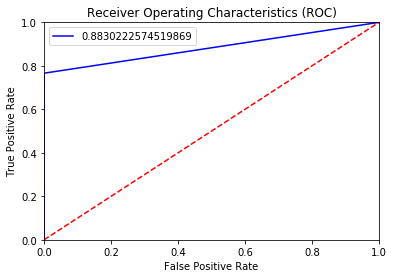

In [36]:
# ROC Curve
plt.title('Receiver Operating Characteristics (ROC)')
plt.plot(fpr,tpr,'b',label=auc)
plt.legend(loc='best')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [37]:
# AUC with probability values
fpr,tpr,z = metrics.roc_curve(Y_test, y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)
print('Area Under the Curve(AUC): ',auc)
print(z)

Area Under the Curve(AUC):  0.9354650002090882
[2.00000000e+00 1.00000000e+00 1.00000000e+00 9.99894798e-01
 9.99821609e-01 9.99749506e-01 9.99711360e-01 9.99064443e-01
 9.99038461e-01 9.98756778e-01 9.98092320e-01 9.98029828e-01
 9.94769183e-01 9.94128500e-01 9.93744494e-01 9.93444675e-01
 9.92315789e-01 9.91913981e-01 9.82120889e-01 9.75974440e-01
 9.56825428e-01 9.50544775e-01 9.45848583e-01 9.43920548e-01
 8.93480706e-01 8.80486927e-01 7.25777217e-01 7.01666868e-01
 4.82172013e-02 4.81835479e-02 4.72674047e-02 4.72309463e-02
 2.81266241e-02 2.81254350e-02 1.96656997e-02 1.96606359e-02
 1.79104487e-02 1.79085384e-02 1.69290790e-02 1.69286731e-02
 1.60425266e-02 1.60420985e-02 1.51768647e-02 1.51763659e-02
 1.46814677e-02 1.46809011e-02 1.40156492e-02 1.40154621e-02
 1.34172439e-02 1.34169920e-02 1.32660844e-02 1.32658366e-02
 1.23047121e-02 1.23045150e-02 1.22152076e-02 1.22150149e-02
 1.20639792e-02 1.20637912e-02 1.12143157e-02 1.12140732e-02
 1.03663116e-02 1.03662169e-02 9.88664

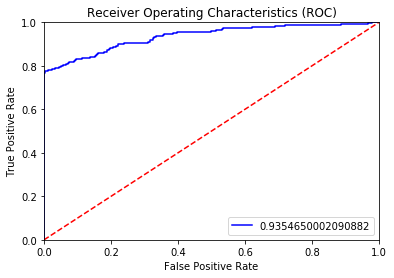

In [38]:
plt.title('Receiver Operating Characteristics (ROC)')
plt.plot(fpr,tpr,'b',label=auc)
plt.legend(loc='best')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [39]:
# Using Cross-Validation for Logistic Regression
classifier = (LogisticRegression())
#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv = KFold(n_splits=10)
print(kfold_cv)

KFold(n_splits=10, random_state=None, shuffle=False)


In [40]:
from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result = cross_val_score(estimator=classifier,X=X_train,y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
# finding the mean of kfold_cv_result
print(kfold_cv_result.mean())

[0.98566368 0.99388451 0.99746023 0.99801163 0.99652453 0.99659136
 0.99729314 0.99685871 0.9976607  0.9976607 ]
0.9957609198659986


In [41]:
# We now try running the data with a new algorithm

# Decision Tree

In [43]:
X_train = df_rev.values[:598478,:-1]
X_test = df_rev.values[598478:,:-1]
Y_train = df_rev.values[:598478,-1]
Y_test = df_rev.values[598478:,-1]

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [45]:
# Predicting using decision_tree_classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=10, min_samples_leaf=5,
                           max_depth=10)
#fit the model on the data and predict the values
dt.fit(X_train, Y_train)
#predicting Y values
Y_pred = dt.predict(X_test)

In [46]:
# Classification report and Accuracy score check
cfm = confusion_matrix(Y_test, Y_pred)
print(cfm)
print('Classification Report: ')
print(classification_report(Y_test, Y_pred))
acc = accuracy_score(Y_test, Y_pred)
print('Decision Tree Accuracy Score: ', acc)

[[248343      4]
 [     1    230]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    248347
         1.0       0.98      1.00      0.99       231

    accuracy                           1.00    248578
   macro avg       0.99      1.00      0.99    248578
weighted avg       1.00      1.00      1.00    248578

Decision Tree Accuracy Score:  0.9999798855892316


In [47]:
# Checking the important features according to the model
print(list(zip(colname,dt.feature_importances_)))

[('term', 0.0004954738500545767), ('grade', 0.19223418030115655), ('sub_grade', 0.003970898419518785), ('home_ownership', 0.0), ('verification_status', 3.97766369996827e-06), ('purpose', 0.0002418416672815401), ('earliest_cr_line', 4.100595601654545e-06), ('initial_list_status', 3.761471935839682e-05), ('last_pymnt_d', 0.0), ('last_credit_pull_d', 1.8931616032843347e-05), ('application_type', 0.0)]


In [48]:
# using cross-validation on Decision tree model
classifier = (DecisionTreeClassifier())
#performing kfold_cross_validation
kfold_cv = KFold(n_splits=5)
print(kfold_cv)

KFold(n_splits=5, random_state=None, shuffle=False)


In [49]:
from sklearn.model_selection import cross_val_score
kfold_cv_result = cross_val_score(estimator=classifier,X=X_train,
                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
print(kfold_cv_result.mean())

[0.98540469 0.99925645 0.99951544 0.99964911 0.99970759]
0.9967066557891628


In [50]:
for train_value, test_value in kfold_cv.split(X_train):
    classifier.fit(X_train[train_value],Y_train[train_value]).predict(X_train[test_value])
    
Y_pred = classifier.predict(X_test)
#print(list(zip(Y_test, Y_pred)))

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report : ")
print(classification_report(Y_test,Y_pred))
acc = accuracy_score(Y_test,Y_pred)
print("Cross Validation Decision Tree Accuracy : ",acc)

[[248288     59]
 [     2    229]]
Classification report : 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    248347
         1.0       0.80      0.99      0.88       231

    accuracy                           1.00    248578
   macro avg       0.90      1.00      0.94    248578
weighted avg       1.00      1.00      1.00    248578

Cross Validation Decision Tree Accuracy :  0.9997546041886249


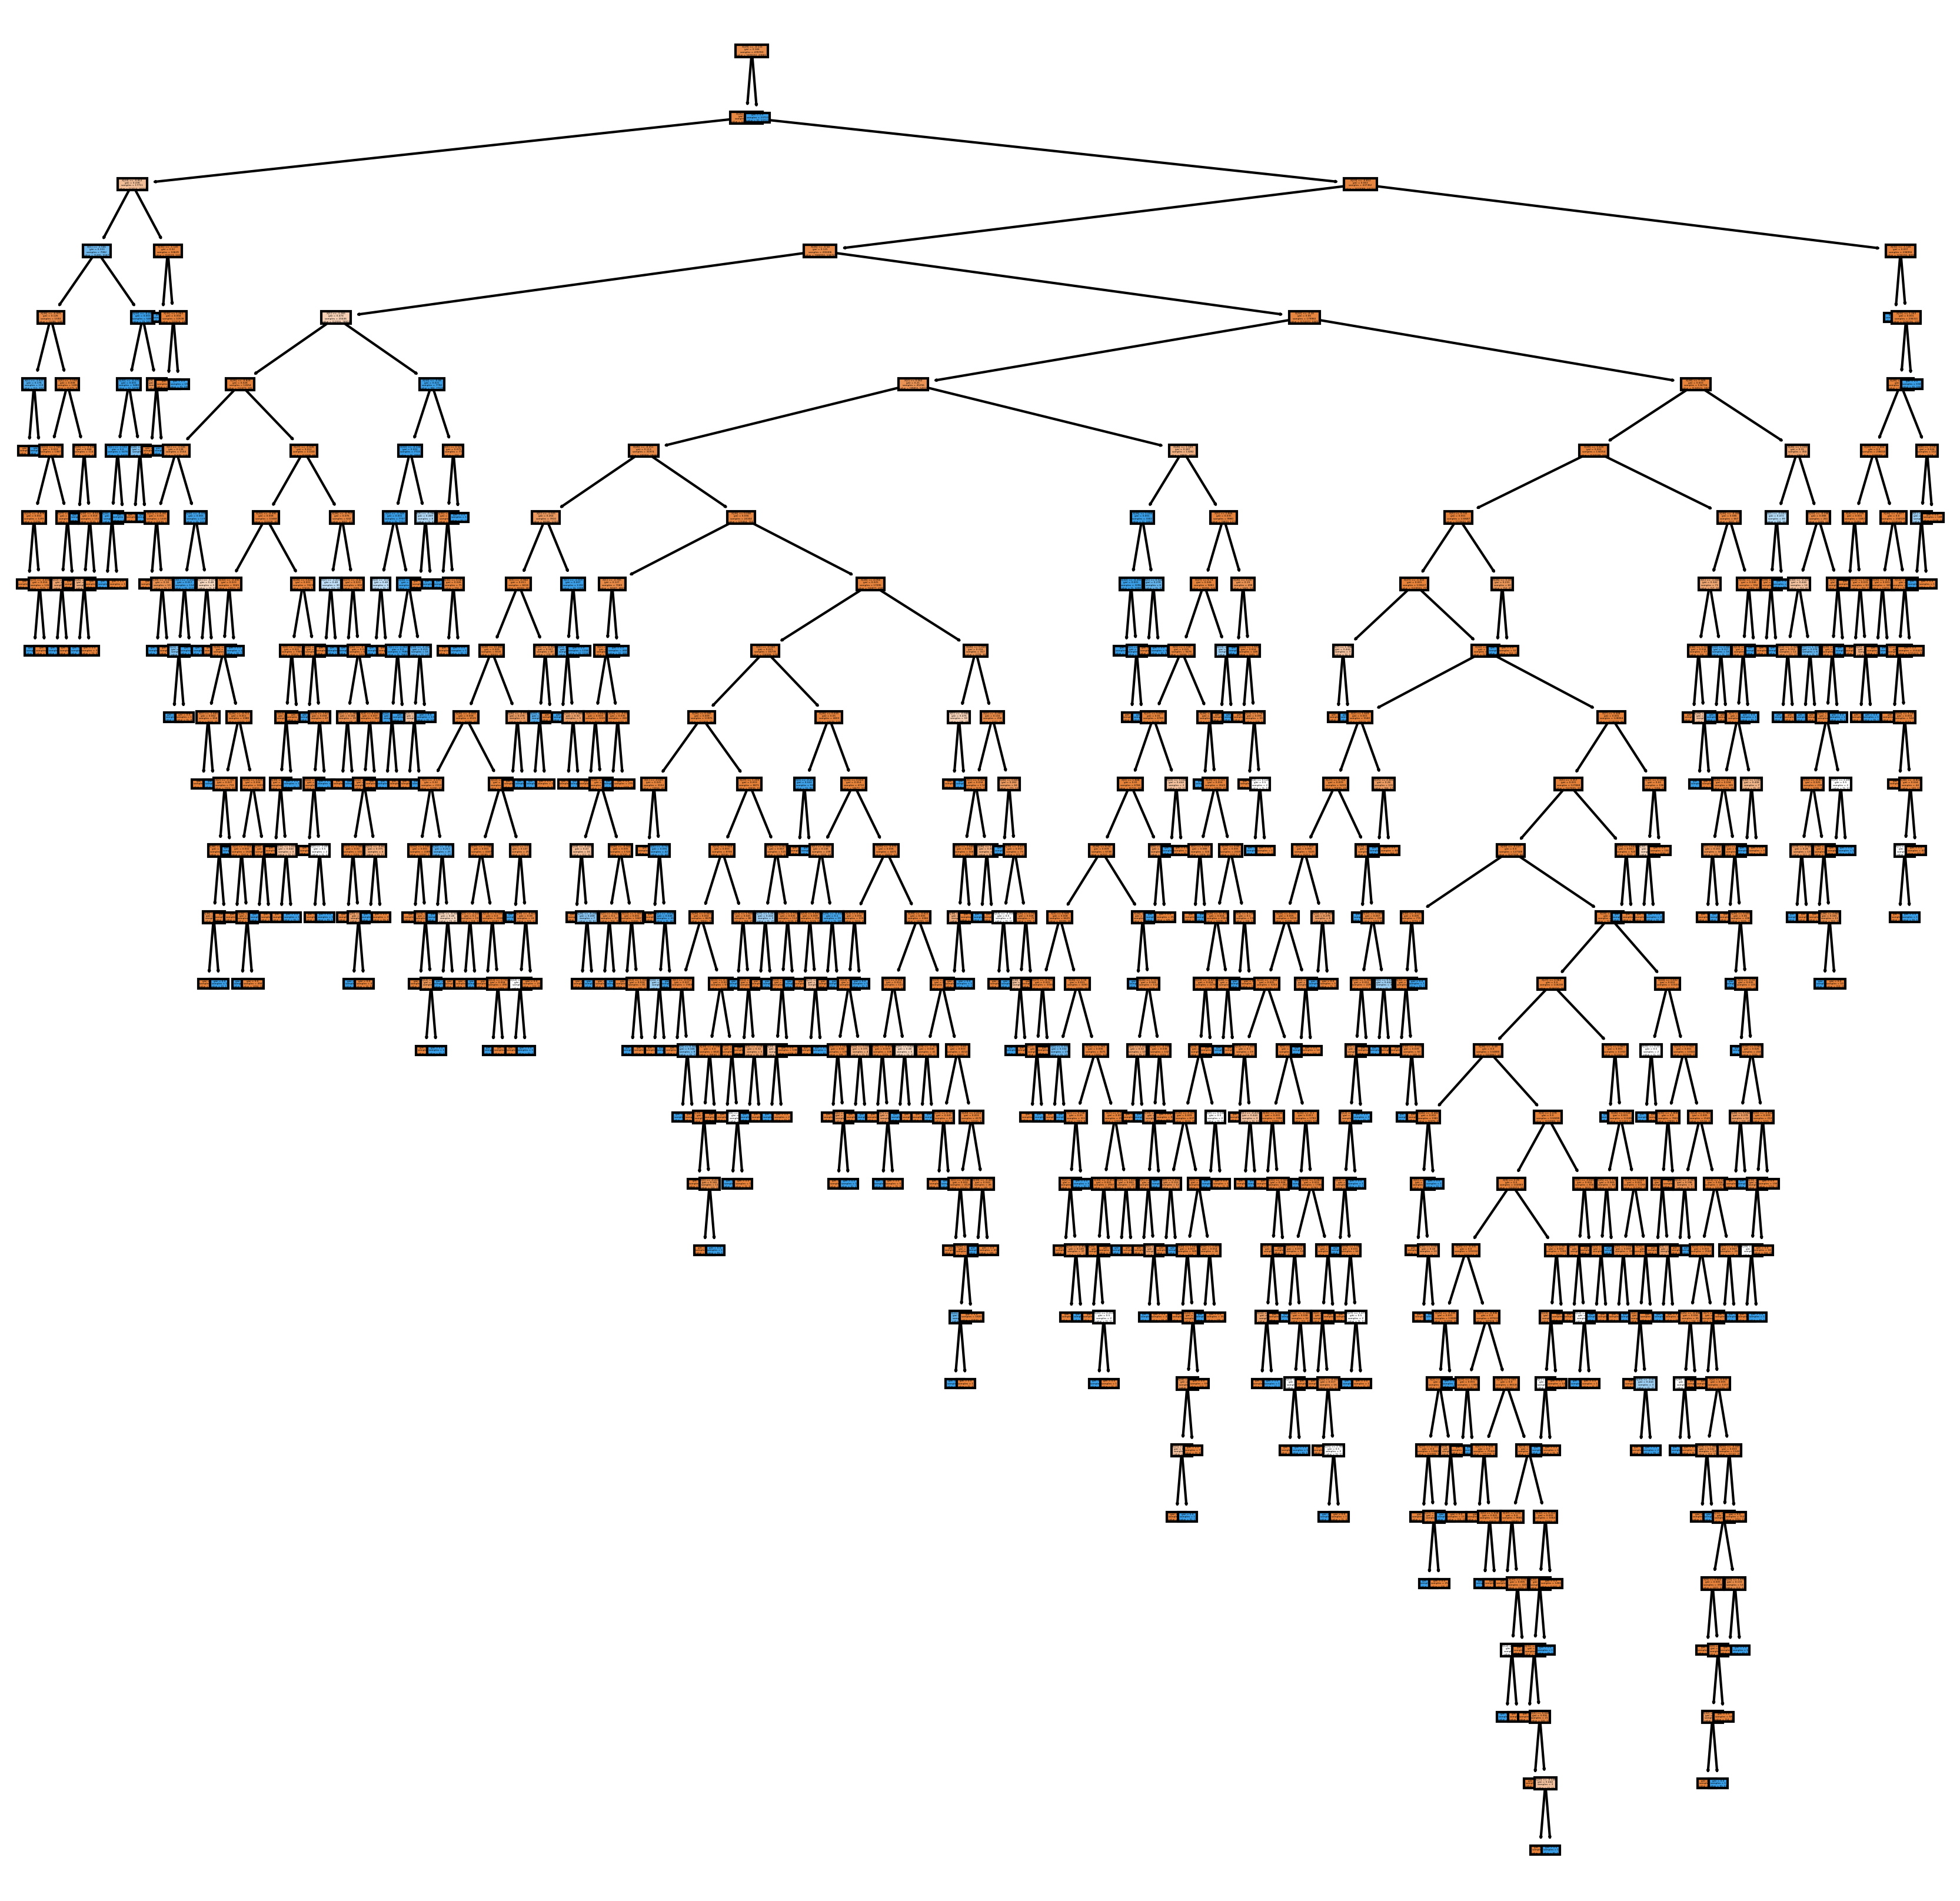

In [53]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (14,14), dpi=300)
tree.plot_tree(classifier, filled=True);
fig.savefig('decisionTree_xyz_corp.png')